## Part 1: Import, Load Data.

* ### Import 

In [1]:
# import standard libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


* ### Load Data

In [2]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# identify target
target = train['Profit']

## Part 2: Exploratory Data Analysis.

* ### Info

In [3]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
ID                 50 non-null int64
R&D Spend          48 non-null float64
Administration     50 non-null float64
Marketing Spend    47 non-null float64
State              50 non-null object
Category           49 non-null object
Profit             50 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.4+ KB


In [4]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
ID                 50 non-null int64
R&D Spend          48 non-null float64
Administration     48 non-null float64
Marketing Spend    50 non-null float64
State              49 non-null object
Category           50 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 2.0+ KB


* ### Head

In [5]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [6]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [7]:
# target variable
train['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

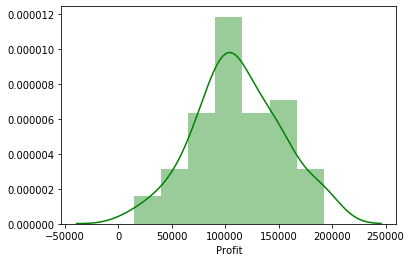

In [8]:
# visualisation of 'Profit' distribution
sns.distplot(train['Profit'], color='g')

In [9]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')

* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [10]:
# check for Numerical and Categorical features in Train
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats_train))
print ()
print (train[numerical_feats_train].columns)
print ()
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats_train))
print ()
print (train[categorical_feats_train].columns)

Quantity of Numerical features:  4

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Quantity of Categorical features:  2

Index(['State', 'Category'], dtype='object')


* ### Missing values

#### List of data features with missing values

In [11]:
# check the Train features with missing values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

There are 3 columns with NAN values for 50 rows.


['R&D Spend', 'Marketing Spend', 'Category']

In [12]:
# check the Test features with missing values
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

There are 3 columns with NAN values for 50 rows.


['R&D Spend', 'Administration', 'State']

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [13]:
 # Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
    ]

# replace 'NAN' with 'mean' in these columns
train.fillna(train.mean(), inplace = True)  
test.fillna(test.mean(), inplace = True)


# Categorical NAN columns to fill in Train and Test datasets
na_columns_fill = [
    'State', 
    'Category'
    ]

# replace 'NAN' with 'None' in these columns
for col in na_columns_fill:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

In [14]:
# check is there any mising values left in Train
train.isnull().sum().sum()

0

In [15]:
# check is there any mising values left in Test
test.isnull().sum().sum()

0

#### Visualisation  of Numerical features (regplot)

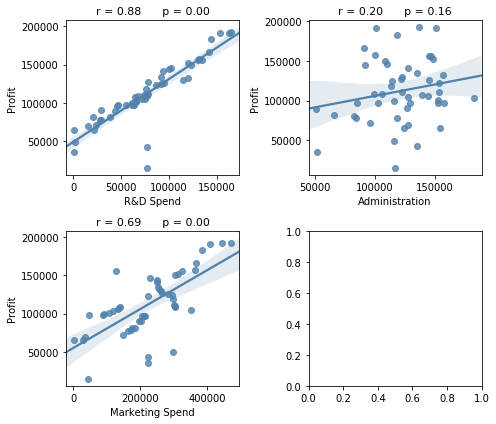

In [16]:
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats_train)
not_plot = ['Id',  'Profit']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(train[plot_num_feats[i]], train['Profit'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()

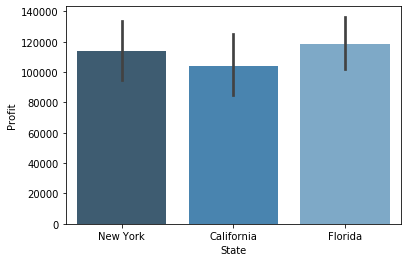

In [17]:
# profit split in State level
sns.barplot(x = 'State', y = 'Profit', data = train, palette = "Blues_d")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

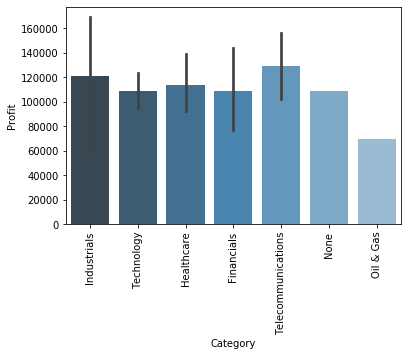

In [18]:
# profit split in State level
sns.barplot(x = 'Category', y = 'Profit', data = train, palette = "Blues_d")
plt.xticks(rotation=90)